# Routing Examples
This notebook contains examples of the functionality present in the OSMNX extension "routing".

In [1]:
import osmnx as ox
import networkx as nx

%matplotlib inline
ox.config(log_file=True, log_console=True, use_cache=True)

### Example 1: Routing without Frequency Information
In this example, we create routing without frequency information, based on the default algorithm.

In [18]:
# create 1 km route starting from (51.5208513, -0.1148912)
newroute = ox.generate_route(51.5208513, -0.1148912, 1)

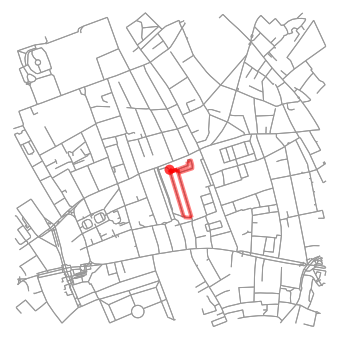

In [20]:
# visualize route overlaid on city map
streets = ox.graph_from_point((51.5208513, -0.1148912), distance=1000/1.75, network_type='walk')
fig, ax = ox.plot_graph_route(streets, newroute, node_size=0)

In [4]:
from IPython.display import IFrame
graph_map = ox.plot_graph_folium(streets, edge_width=2)

In [5]:
# save as html file then display map as an iframe
filepath = 'data/graph.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

In [7]:
def no_duplicates(route):
    for i in range(len(route)-2):
        if route[i] == route[i+1]:
            del route[i]
    return route

In [22]:
newroute_nodup = no_duplicates(newroute)

In [23]:
# plot the route with folium on top of the previously created graph_map
route_graph_map = ox.plot_route_folium(streets, newroute_nodup)

In [24]:
# save as html file then display map as an iframe
filepath = 'data/route_graph.html'
route_graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

### Example 2: Routing with Frequency
Here, we read in past GPX tracks (see GPX Matching example notebook for more) to create a dictionary of which paths have been traversed.

_Note: For some reason, the frequency generation does not always work.  It seems to depend on the frequency of request as well as the number of points._

In [11]:
# read in gpx, view resultant frequency dictionary
folder = "/Users/heidihurst/Documents/UK/ucl-gis/ucl_msc/term2/networks/alltrax"
freq = ox.freq_from_folder(folder,npoints=250)
print(freq)

{(629099004, 244668080, 0): 1, (811891541, 10928096, 0): 1, (10928096, 811891815, 0): 2, (811891815, 10928097, 0): 1, (10928097, 811891631, 0): 1}


In [12]:
# create 1 km route starting from (51.5208513, -0.1148912)
# 51.5223019,-0.1107007
newroute_freq = ox.generate_route(51.5223019,-0.1107007, 10)

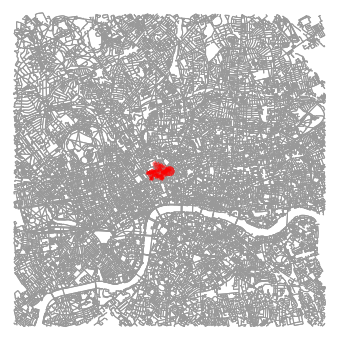

In [13]:
# visualize route overlaid on city map
streets_freq = ox.graph_from_point((51.5223019,-0.1107007), distance=10000/1.75, network_type='walk')
fig, ax = ox.plot_graph_route(streets_freq, newroute_freq, node_size=0)

In [25]:
# create webmap
newroute_map = ox.plot_route_folium(streets_freq, newroute_freq, route_opacity=0.3)

In [26]:
# save as html file then display map as an iframe
filepath = 'data/long_route.html'
newroute_map.save(filepath)
IFrame(filepath, width=600, height=500)

### Sticking Points: Dead Ends
In most cases, the "simplify_graph" command removes all nodes that aren't intersections or dead ends.  In rare cases (usually at the edge of the map, though occasionally closer in) dead ends to not get appropriately addressed. One case is shown below.  While it is easy to tell if you are on the final segment of a dead end, it may not be easy to tell if you are on an intermediate segment of a dead end.  A fix has been implemented for these cases, where only one intermediate segment exists.

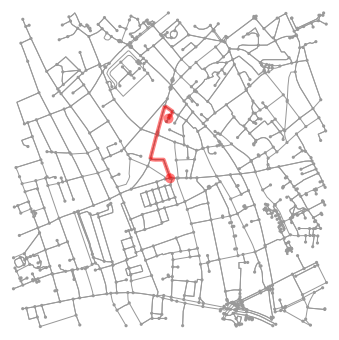

In [16]:
# example of dead end
problem_route = [11546253, 18670874,25497664,25497878,877245092,1159495421]
streets = ox.graph_from_point((51.5223019,-0.1107007), distance=1000/1.75)
fig, ax = ox.plot_graph_route(streets, problem_route, node_size=10)

### Example 3: Route Novelty
Determine how novel the route obtained above is.

In [17]:
novel_segments, novel_length = ox.novelty_score(streets, newroute_freq, freq)
route_length = ox.total_route_length(streets, newroute_freq)
message = 'Route contains {}/{} novel segments, accounting for {}km ({:0.1f}% of the total length)'
print(message.format(novel_segments,len(newroute_freq)-1,novel_length/1000,100*novel_length/route_length))

Route contains 159/159 novel segments, accounting for 5.621033km (100.0% of the total length)
